# Exercise 4.9 Part 2

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## importing uptodate data set

In [4]:
path=path=(r"C:\Users\hardjan\Instacart Basket Analysis March 2024")
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_derived(4.9(1)).pkl'))

MemoryError: 

In [3]:
df.head()

,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,user_id,...,order_frequency,first_name,surname,Gender,State,Age,date_joined,dependants,family_status,income
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,16802,1987,3139998,138,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,16806,1989,1977647,138,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,907,Premium Sliced Bacon,106,12,20.0,16675,1960,3160996,138,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,907,Premium Sliced Bacon,106,12,20.0,16725,1969,2254091,138,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,1000,Apricots,18,10,12.9,16723,1968,505689,138,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


## 2. Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

### subsetting the Dataframe 

In [4]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

#### create two data frames small 30% and  big 70%

In [5]:
big=df[dev]

In [6]:
small=df[~dev]

In [7]:
# check the lengths of the two dataframes 
df.shape

(32404859, 37)

In [8]:
len(big)

22683761

In [28]:
len(small)

9721098

## 3.Histogram

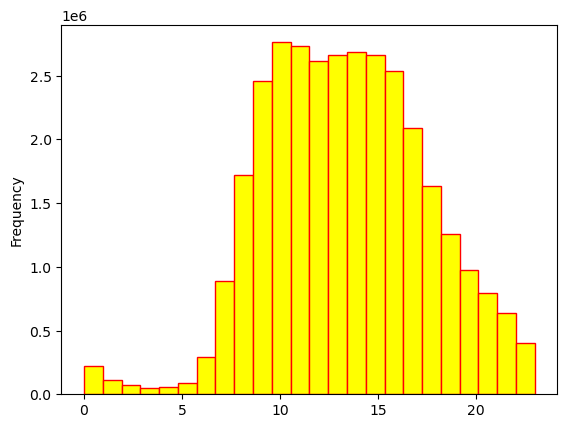

In [17]:
hist=df['order_hour_of_day'].plot.hist(bins = 24,color='yellow',edgecolor='red')



#### There is a higher frequency between 10:00 to 15:00

## 4.Create a bar chart from the “loyalty_flag” column.

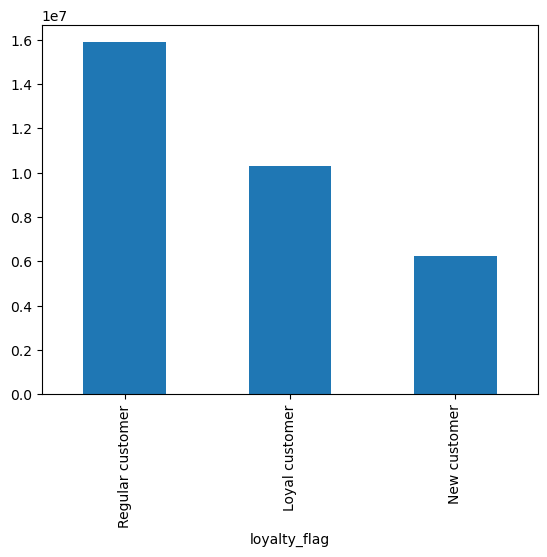

In [39]:
bar_loyalty =df['loyalty_flag'].value_counts().plot.bar()

### More orders are made by Regular customers and then by Loyal Customers and Few by New customers .

### 5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [26]:
small_prices_hod = small[['order_hour_of_day','prices']]

C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


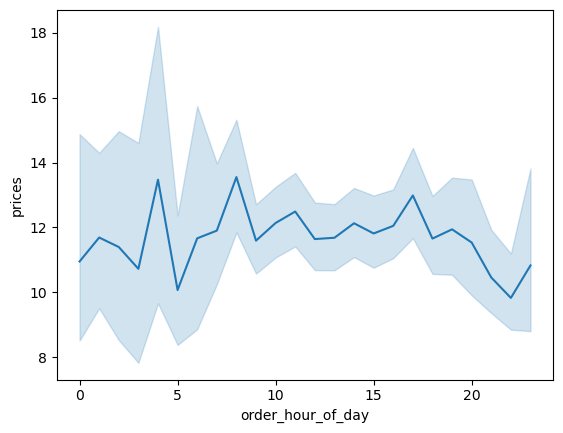

In [25]:
line=sns.lineplot(data=small_prices_hod,x='order_hour_of_day',y='prices')

## 6 First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [31]:
# create a subset with needed columns 
small_age_dependants = small[['Age','dependants']]

C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


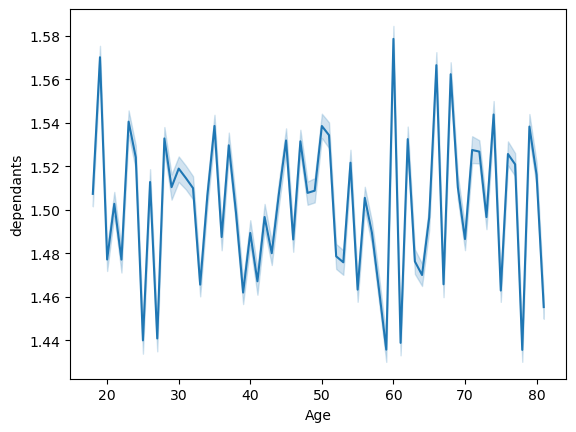

In [32]:
# create line chart 
line_dependants=sns.lineplot(data = small_age_dependants, x = 'Age',y = 'dependants')

#### 7 You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [34]:
# create subset that only includes needed columns

small_age_income = small[['Age','income']]

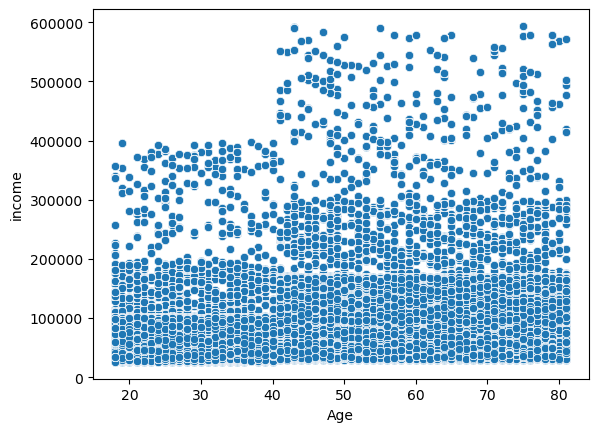

In [35]:
# create scatterplot for age & income

plot_age_income = sns.scatterplot(x = 'Age', y = 'income',data = small_age_income)

In [36]:
# check max income by age

small_age_income.groupby('Age').agg({'income': ['max']}).head(50)

,income
,max
Age,
18,357226
19,396364
20,338939
21,372571
22,369192
23,381379
24,391834
25,385324


##### Part 2 Question 8
##### Export your visualizations as “.png” files in your relevant project folder.

In [38]:

# save histogram figure
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_histogram.png'))

In [40]:
# export bar chart

bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_4.9_task.png'))


In [42]:
# export prices hour line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hod_4.9_task.png'))

In [44]:
# export age dependants line chart

line_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants_4.9_task.png'))

In [46]:
# export scatterplot
plot_age_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','plot_age_income_4.9_task.png'))